In [1]:
# Importing necessary libraries
import nltk
import spacy
import  pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize

In [2]:
### To install spacy and Textblob do the following from the Anaconda terminal

## Spacy ##
#pip install spacy
#spacy download en

##  Textblob  ##
!pip install -U textblob
!python -m textblob.download_corpora

Requirement already up-to-date: textblob in c:\users\gabriella\anaconda3\lib\site-packages (0.15.3)
Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Gabriella\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gabriella\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gabriella\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Gabriella\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Gabriella\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Gabriella\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_review

In [3]:
# Reading in our data file
script_df = pd.read_csv("Game_of_Thrones_Script.csv", encoding = 'utf-8', header = 0)
print(script_df)

      Release Date    Season    Episode     Episode Title              Name  \
0       2011-04-17  Season 1  Episode 1  Winter is Coming      waymar royce   
1       2011-04-17  Season 1  Episode 1  Winter is Coming              will   
2       2011-04-17  Season 1  Episode 1  Winter is Coming      waymar royce   
3       2011-04-17  Season 1  Episode 1  Winter is Coming              will   
4       2011-04-17  Season 1  Episode 1  Winter is Coming             gared   
...            ...       ...        ...               ...               ...   
23906   2019-05-19  Season 8  Episode 6   The Iron Throne           brienne   
23907   2019-05-19  Season 8  Episode 6   The Iron Throne             bronn   
23908   2019-05-19  Season 8  Episode 6   The Iron Throne  tyrion lannister   
23909   2019-05-19  Season 8  Episode 6   The Iron Throne               man   
23910   2019-05-19  Season 8  Episode 6   The Iron Throne               all   

                                                Sen

In [4]:
# Checking the top few rows 
script_df.head()

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


In [5]:
# Checking the last few rows
script_df.tail()

,Release Date,Season,Episode,Episode Title,Name,Sentence
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...
23909,2019-05-19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!
23910,2019-05-19,Season 8,Episode 6,The Iron Throne,all,The Queen in the North! The Queen in the North...


In [6]:
# We need a way to select the main characters 
# Maybe check persons who are in every season and who have the most sentences / words

In [7]:
# Importing stopwords and punctuations to be removed from script
import string
from nltk.corpus import stopwords 
from  spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem import PorterStemmer
ps = PorterStemmer()
punc = string.punctuation
stop_words = set(stopwords.words('english')) # NLTK
stopwords = list(STOP_WORDS) # spacy
print(stopwords)
#print(stop_words)

['off', 'ourselves', 'against', 'rather', 'three', 'otherwise', 'becomes', 'go', 'fifty', 'serious', 'whatever', 'though', 'latterly', 'only', 'least', 'n’t', 'whenever', 'put', 'across', 'what', 'amount', 'of', 'since', 'each', 'until', 'same', 'should', 'next', 'no', 'give', 'may', 'itself', 'almost', 'somehow', 'thence', 'this', 'become', 'nowhere', 'move', 'towards', '‘ll', 'fifteen', 'be', 'very', 'my', 'now', 'often', 'are', 'by', 'onto', 'those', 'would', 'former', 'into', 'thus', 'using', 'been', 'they', 'third', 'will', 'wherever', 'sixty', 'nevertheless', 'than', 'both', 'therefore', 'do', 'always', 'us', '‘ve', 'here', "'m", 'whether', 'most', 'please', 'alone', 'another', 'except', 'first', 'moreover', 'was', 'somewhere', 'twelve', 'nor', 'already', 'something', "'re", 'being', 'quite', 'more', 'nothing', 'even', 'who', 'various', 'bottom', 'together', 'else', 'in', 'again', 'eleven', 'after', 'between', 'neither', 'although', 'five', 'formerly', 'seeming', 'much', 'everyon

In [8]:
# Remove release date, episode and episode title, tokenize the words in each sentence and count words/sentence
script_clean = script_df.drop(columns=['Release Date','Episode','Episode Title'])
script_clean['Tokenized Words'] = script_clean['Sentence'].apply(lambda x: word_tokenize(x))
script_clean['Tokenized Alphanumeric Words'] = script_clean['Tokenized Words'].apply(lambda x: [word for word in x if word.isalnum()])
script_clean['Lowered_noPunc_noStop'] = script_clean['Tokenized Words'].apply(lambda x: [word.lower() for word in x if word not in stopwords and word not in punc])
script_clean['Word Count'] = script_clean['Lowered_noPunc_noStop'].apply(len)
script_clean.head()

,Season,Name,Sentence,Tokenized Words,Tokenized Alphanumeric Words,Lowered_noPunc_noStop,Word Count
0,Season 1,waymar royce,What do you expect? They're savages. One lot s...,"[What, do, you, expect, ?, They, 're, savages,...","[What, do, you, expect, They, savages, One, lo...","[what, expect, they, savages, one, lot, steals...",12
1,Season 1,will,I've never seen wildlings do a thing like this...,"[I, 've, never, seen, wildlings, do, a, thing,...","[I, never, seen, wildlings, do, a, thing, like...","[i, seen, wildlings, thing, like, i, seen, thi...",10
2,Season 1,waymar royce,How close did you get?,"[How, close, did, you, get, ?]","[How, close, did, you, get]","[how, close]",2
3,Season 1,will,Close as any man would.,"[Close, as, any, man, would, .]","[Close, as, any, man, would]","[close, man]",2
4,Season 1,gared,We should head back to the wall.,"[We, should, head, back, to, the, wall, .]","[We, should, head, back, to, the, wall]","[we, head, wall]",3


In [9]:
# Extracting the top characters with the most words over entire series
season_top_char = script_clean.groupby(['Name','Season'])['Word Count'].sum().reset_index().sort_values(by=['Word Count'], ascending=[0])
season_top_char.head(20) # looking at the top 20 persons per season

,Name,Season,Word Count
906,tyrion lannister,Season 2,2393
905,tyrion lannister,Season 1,1861
908,tyrion lannister,Season 4,1792
209,eddard stark,Season 1,1716
362,jon snow,Season 7,1634
909,tyrion lannister,Season 5,1586
907,tyrion lannister,Season 3,1573
911,tyrion lannister,Season 7,1537
130,cersei lannister,Season 7,1489
912,tyrion lannister,Season 8,1481


From above we can see that not only does Tyrion dominate most seasons but the Lannisters overall lead overwhelmingly in words
So I then decided to pull out the word counts per character and then check the top 20

In [10]:
# Word count for each Character over entire season
characters_words = script_clean.groupby(['Name'])['Word Count'].sum().reset_index().sort_values(by=['Word Count'], ascending=[0])
# Create dataframe to store top 20 characters by word count
dff = pd.DataFrame()
dff['Names'] = np.array(characters_words.head(20)['Name'].tolist())
dff['Word_count'] = np.array(characters_words.head(20)['Word Count'].tolist())
dff


,Names,Word_count
0,tyrion lannister,13513
1,cersei lannister,7443
2,jon snow,6451
3,daenerys targaryen,6299
4,jaime lannister,6164
5,sansa stark,4172
6,petyr baelish,3761
7,davos,3572
8,arya stark,3567
9,varys,3401


We can see that even in the Top 5 the Lannisters took 3 spots with Jon ans Daenerys being the other two. 
Plotted a graph below highlighting the top 10 that will be analysed.

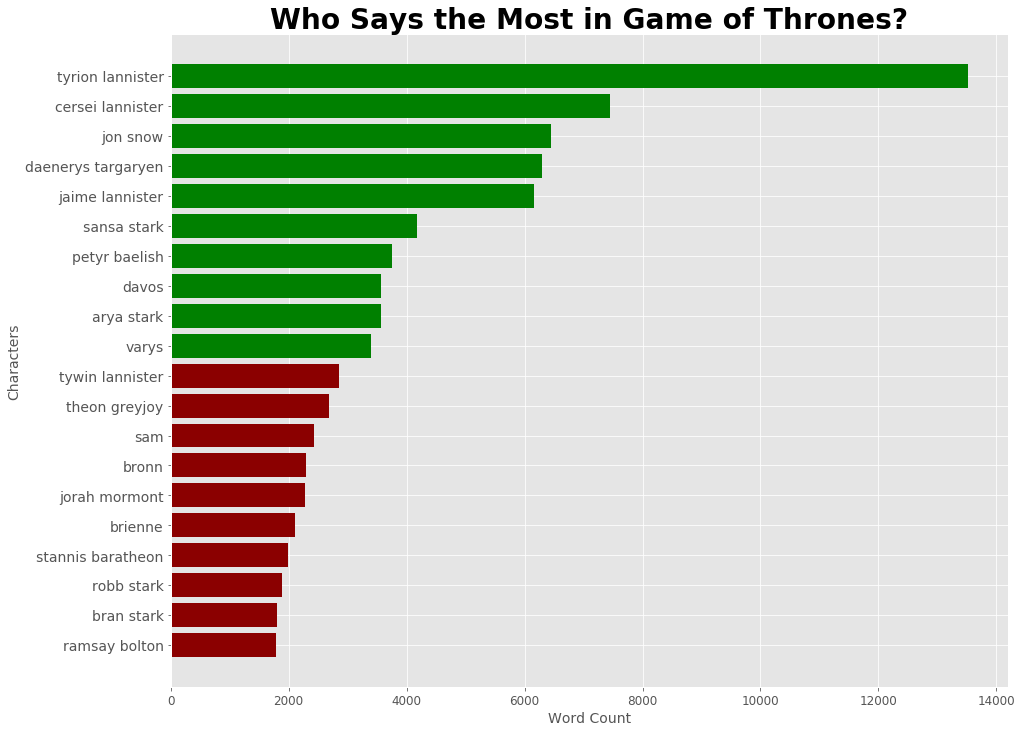

In [11]:
# Graphical Representation of the above
### Themes ###
plot_theme = 'ggplot'
#plot_theme = 'fivethirtyeight'
#plot_theme = 'seaborn-dark-palette'
#plot_theme = 'dark_background'
#plot_theme = 'seaborn-deep'
#plot_theme = 'seaborn-dark'
#plot_theme = 'seaborn-darkgrid'

# Apply coloring to show the top 10 characters(green) who will be choosen and editing plot for better look
plt.style.use(plot_theme)
cols = np.array(["green", "darkred"])
mycolor =  (np.repeat(cols, [10, 10], axis=0))
fig, ax = plt.subplots(figsize=(15, 12))
y_pos = np.arange(len(dff['Names']))
ax.barh(y_pos, dff['Word_count'], align='center', color=mycolor)
ax.set_yticks(y_pos)
ax.set_yticklabels(dff['Names'], size=14)
ax.tick_params(axis='x', labelsize=12)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Word Count', size=14)
ax.set_ylabel('Characters', size=14)
ax.set_title('Who Says the Most in Game of Thrones?', size=28, weight=600, ha='center')
plt.show()

In [12]:
# Applying tagging, stemming 
script_tagstem = script_clean
script_tagstem['Pos_tag'] = script_tagstem['Lowered_noPunc_noStop'].apply(nltk.tag.pos_tag)
script_tagstem['Porter_stemmer'] = script_tagstem['Lowered_noPunc_noStop'].apply(lambda x: [ps.stem(word) for word in x])
script_tagstem.head()

,Season,Name,Sentence,Tokenized Words,Tokenized Alphanumeric Words,Lowered_noPunc_noStop,Word Count,Pos_tag,Porter_stemmer
0,Season 1,waymar royce,What do you expect? They're savages. One lot s...,"[What, do, you, expect, ?, They, 're, savages,...","[What, do, you, expect, They, savages, One, lo...","[what, expect, they, savages, one, lot, steals...",12,"[(what, WP), (expect, VBP), (they, PRP), (sava...","[what, expect, they, savag, one, lot, steal, g..."
1,Season 1,will,I've never seen wildlings do a thing like this...,"[I, 've, never, seen, wildlings, do, a, thing,...","[I, never, seen, wildlings, do, a, thing, like...","[i, seen, wildlings, thing, like, i, seen, thi...",10,"[(i, NN), (seen, VBN), (wildlings, NNS), (thin...","[i, seen, wildl, thing, like, i, seen, thing, ..."
2,Season 1,waymar royce,How close did you get?,"[How, close, did, you, get, ?]","[How, close, did, you, get]","[how, close]",2,"[(how, WRB), (close, JJ)]","[how, close]"
3,Season 1,will,Close as any man would.,"[Close, as, any, man, would, .]","[Close, as, any, man, would]","[close, man]",2,"[(close, JJ), (man, NN)]","[close, man]"
4,Season 1,gared,We should head back to the wall.,"[We, should, head, back, to, the, wall, .]","[We, should, head, back, to, the, wall]","[we, head, wall]",3,"[(we, PRP), (head, VBP), (wall, VB)]","[we, head, wall]"


In [13]:
# Choosing the top ten characters based on word count to be main charcaters analysed for sentiment
top10 = script_tagstem.groupby(['Name'])['Word Count'].sum().reset_index().sort_values(by=['Word Count'], ascending=[0]).head(10)['Name']
top10


509      tyrion lannister
70       cersei lannister
193              jon snow
86     daenerys targaryen
180       jaime lannister
437           sansa stark
354         petyr baelish
90                  davos
23             arya stark
519                 varys
Name: Name, dtype: object

In [14]:
# First Attempt at Sentiment Analysis
from textblob import TextBlob

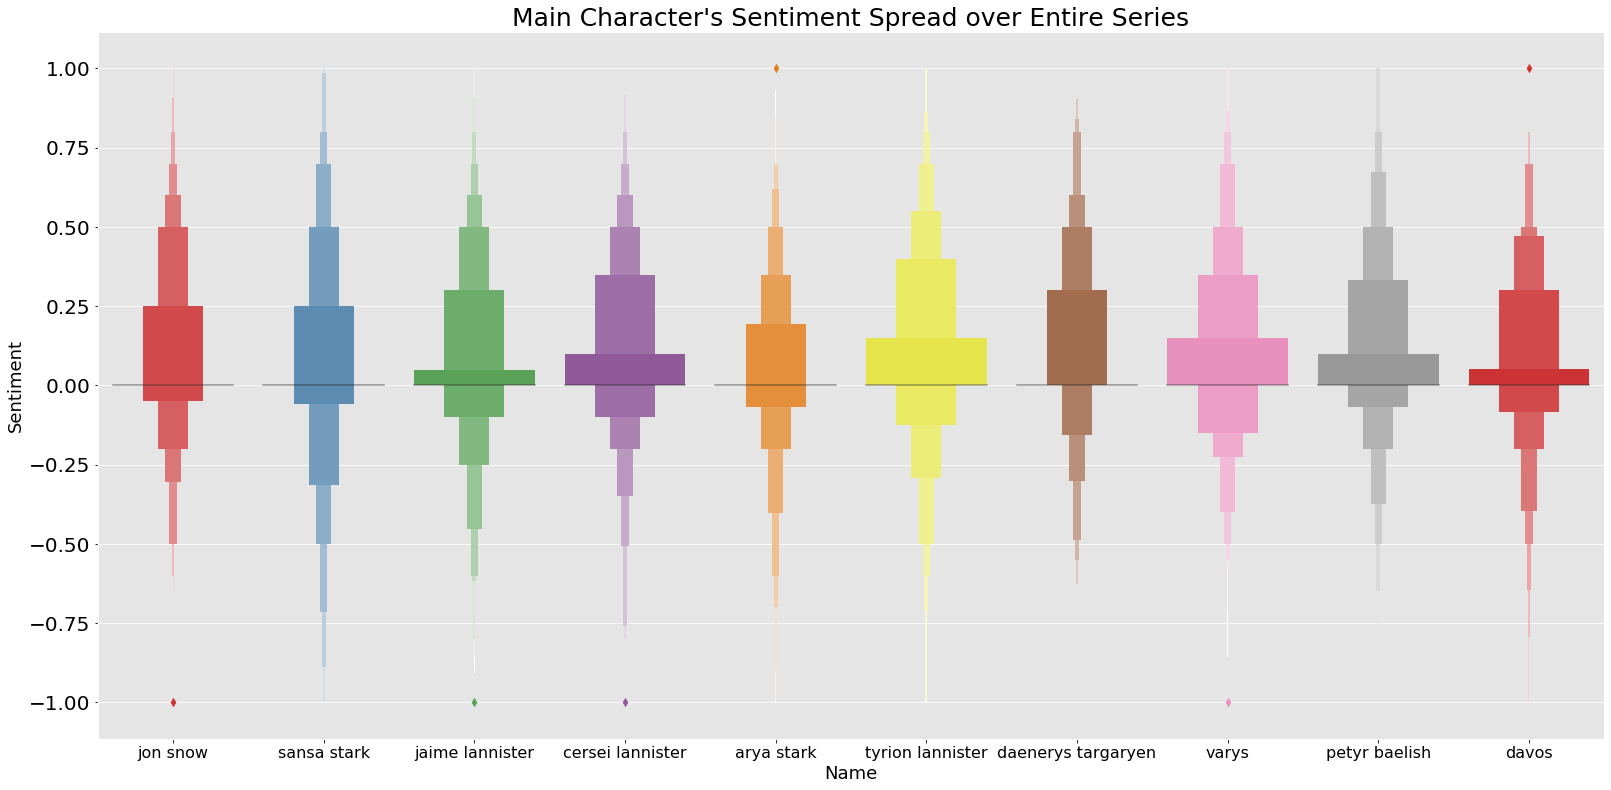

In [15]:
# Add new columns to data representing Sentiment score and polarity
script_sentiment = script_tagstem
script_sentiment['Sentiment Scores'] = script_sentiment['Sentence'].apply(lambda x: TextBlob(x).sentiment)
script_sentiment['Polarity'] = script_sentiment['Sentiment Scores'].apply(lambda x: x[0])
script_sentiment['Subjectivity'] = script_sentiment['Sentiment Scores'].apply(lambda x: x[1])

# Plotting figure of sentiment spread of main characters over entire season
fig, ax = plt.subplots(figsize=(27,13))
# Editing plot elements for better look
ax.tick_params(axis='x', labelsize=16, colors='#010101')
ax.tick_params(axis='y', labelsize=20, colors='#010101')
sns.boxenplot(x='Name', y='Polarity', data=script_sentiment[script_sentiment['Name'].isin(top10)], palette="Set1")
plt.title("Main Character's Sentiment Spread over Entire Series", fontsize=25)
plt.xlabel("Name", fontsize=18, color='#010101')
plt.ylabel("Sentiment", fontsize=18, color='#010101')
plt.show() 

In the graph above we can see that for the top ten characters their dialogue mainly had a positive sentimen.t 

In [16]:
# Setting rules by which positive, neutral and negative sentiments are determined
script_sentiment['Positive'] = script_sentiment['Polarity'].apply(lambda x: 1 if x >= 0.05 else 0)
script_sentiment['Neutral'] = script_sentiment['Polarity'].apply(lambda x: 1 if x > -0.05 and x < 0.05 else 0)
script_sentiment['Negative'] = script_sentiment['Polarity'].apply(lambda x: 1 if x <= -0.05 else 0)
script_sentiment

,Season,Name,Sentence,Tokenized Words,Tokenized Alphanumeric Words,Lowered_noPunc_noStop,Word Count,Pos_tag,Porter_stemmer,Sentiment Scores,Polarity,Subjectivity,Positive,Neutral,Negative
0,Season 1,waymar royce,What do you expect? They're savages. One lot s...,"[What, do, you, expect, ?, They, 're, savages,...","[What, do, you, expect, They, savages, One, lo...","[what, expect, they, savages, one, lot, steals...",12,"[(what, WP), (expect, VBP), (they, PRP), (sava...","[what, expect, they, savag, one, lot, steal, g...","(-0.125, 0.375)",-0.125,0.375,0,0,1
1,Season 1,will,I've never seen wildlings do a thing like this...,"[I, 've, never, seen, wildlings, do, a, thing,...","[I, never, seen, wildlings, do, a, thing, like...","[i, seen, wildlings, thing, like, i, seen, thi...",10,"[(i, NN), (seen, VBN), (wildlings, NNS), (thin...","[i, seen, wildl, thing, like, i, seen, thing, ...","(0.0, 0.0)",0.000,0.000,0,1,0
2,Season 1,waymar royce,How close did you get?,"[How, close, did, you, get, ?]","[How, close, did, you, get]","[how, close]",2,"[(how, WRB), (close, JJ)]","[how, close]","(0.0, 0.0)",0.000,0.000,0,1,0
3,Season 1,will,Close as any man would.,"[Close, as, any, man, would, .]","[Close, as, any, man, would]","[close, man]",2,"[(close, JJ), (man, NN)]","[close, man]","(0.0, 0.0)",0.000,0.000,0,1,0
4,Season 1,gared,We should head back to the wall.,"[We, should, head, back, to, the, wall, .]","[We, should, head, back, to, the, wall]","[we, head, wall]",3,"[(we, PRP), (head, VBP), (wall, VB)]","[we, head, wall]","(0.0, 0.0)",0.000,0.000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23906,Season 8,brienne,I think we can all agree that ships take prece...,"[I, think, we, can, all, agree, that, ships, t...","[I, think, we, can, all, agree, that, ships, t...","[i, think, agree, ships, precedence, brothels]",6,"[(i, NN), (think, VBP), (agree, JJ), (ships, N...","[i, think, agre, ship, preced, brothel]","(0.0, 0.0)",0.000,0.000,0,1,0
23907,Season 8,bronn,I think that's a very presumptuous statement.,"[I, think, that, 's, a, very, presumptuous, st...","[I, think, that, a, very, presumptuous, statem...","[i, think, presumptuous, statement]",4,"[(i, NN), (think, VBP), (presumptuous, JJ), (s...","[i, think, presumptu, statement]","(0.2, 0.3)",0.200,0.300,1,0,0
23908,Season 8,tyrion lannister,I once brought a jackass and a honeycomb into ...,"[I, once, brought, a, jackass, and, a, honeyco...","[I, once, brought, a, jackass, and, a, honeyco...","[i, brought, jackass, honeycomb, brothel]",5,"[(i, NN), (brought, VBD), (jackass, NN), (hone...","[i, brought, jackass, honeycomb, brothel]","(-0.5, 0.9)",-0.500,0.900,0,0,1
23909,Season 8,man,The Queen in the North!,"[The, Queen, in, the, North, !]","[The, Queen, in, the, North]","[the, queen, north]",3,"[(the, DT), (queen, JJ), (north, NN)]","[the, queen, north]","(0.0, 0.0)",0.000,0.000,0,1,0


In [17]:
# Count each Charavter Sentiment labels
char_sentiment = script_sentiment.groupby(['Name','Season'])[['Positive','Negative','Neutral']].sum().reset_index()
char_sentiment


,Name,Season,Positive,Negative,Neutral
0,a voice,Season 1,0,0,1
1,addam marbrand,Season 1,1,0,1
2,aemon,Season 4,6,1,5
3,aemon,Season 5,3,5,8
4,aeron,Season 6,2,3,4
...,...,...,...,...,...
1001,young hodor,Season 6,0,0,4
1002,young lyanna,Season 6,0,0,3
1003,young man,Season 6,1,2,1
1004,young ned,Season 6,1,0,5


In [18]:
# calculating the probabilities of each sentiment category
char_sentiment['Positive Polarity Prob'] = char_sentiment['Positive'] / (char_sentiment['Positive'] + char_sentiment['Negative'] + char_sentiment['Neutral'])
char_sentiment['Negative Polarity Prob'] = char_sentiment['Negative'] / (char_sentiment['Positive'] + char_sentiment['Negative'] + char_sentiment['Neutral'])

In [19]:
# The top positive sentiment characters
top_pos = char_sentiment[char_sentiment['Name'].isin(top10)].sort_values(by=['Positive Polarity Prob'], ascending=[0]).head(5)
top_pos

,Name,Season,Positive,Negative,Neutral,Positive Polarity Prob,Negative Polarity Prob
170,davos,Season 4,21,6,21,0.437500,0.125000
931,varys,Season 5,19,5,25,0.387755,0.102041
927,varys,Season 1,24,16,25,0.369231,0.246154
629,petyr baelish,Season 4,18,4,27,0.367347,0.081633
174,davos,Season 8,15,5,21,0.365854,0.121951


In [20]:
# The top negative sentiment characters
top_neg = char_sentiment[char_sentiment['Name'].isin(top10)].sort_values(by=['Negative Polarity Prob'], ascending=[0]).head(5)
top_neg

,Name,Season,Positive,Negative,Neutral,Positive Polarity Prob,Negative Polarity Prob
326,jaime lannister,Season 1,21,24,39,0.250000,0.285714
928,varys,Season 2,22,21,31,0.297297,0.283784
934,varys,Season 8,2,6,16,0.083333,0.250000
630,petyr baelish,Season 5,21,23,48,0.228261,0.250000
927,varys,Season 1,24,16,25,0.369231,0.246154


Its interesting to see that both Tyrion and Jaime appeared in both lists

In [21]:
# Producing the overall sentiment of each season
season_sentiment = script_sentiment.groupby(['Season'])[['Sentence']].sum().reset_index()
season_sentiment["Overall Sentiment"] = [TextBlob(m).polarity for m in season_sentiment["Sentence"]]
season_sentiment

,Season,Sentence,Overall Sentiment
0,Season 1,What do you expect? They're savages. One lot s...,0.074957
1,Season 2,"Well struck… Well struck, Dog.Did you like tha...",0.100790
2,Season 3,Fall back!Brother?Did you send the ravens?Tarl...,0.098716
3,Season 4,Magnificent.Mm-hmm.Looks fresh-forged.It is.No...,0.087008
4,Season 5,We shouldn't be out here alone.Why not?If your...,0.122785
5,Season 6,It's the Lord Commander!Help me get him inside...,0.107087
6,Season 7,You're wonder why I brought you all here. Afte...,0.087031
7,Season 8,You should consider yourself lucky. At least y...,0.104363


Based on the rules I used above sorting the sentiments, all seasons had an overall Neutral sentiment ( -0.5<= Neutral <= 0.5)

In [22]:
# Sentiment Tally for main characters over the seasons

In [23]:
tyrion = script_sentiment[script_sentiment['Name']=='tyrion lannister']
tyrion = tyrion.groupby(['Name','Season'])[['Positive','Negative','Neutral']].sum().reset_index()
tyrion

,Name,Season,Positive,Negative,Neutral
0,tyrion lannister,Season 1,73,38,101
1,tyrion lannister,Season 2,102,65,180
2,tyrion lannister,Season 3,60,49,132
3,tyrion lannister,Season 4,67,35,128
4,tyrion lannister,Season 5,58,24,103
5,tyrion lannister,Season 6,52,20,90
6,tyrion lannister,Season 7,58,38,92
7,tyrion lannister,Season 8,61,29,105


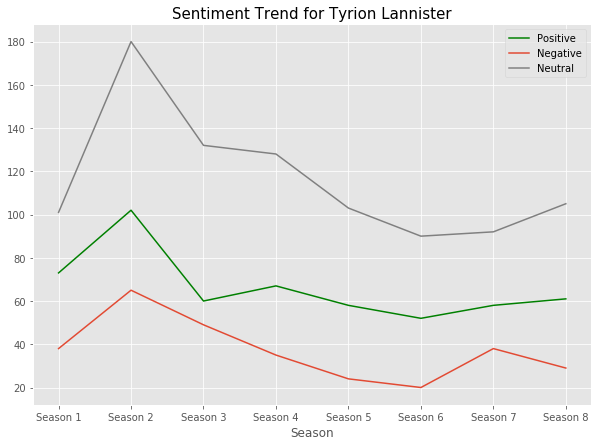

In [24]:
ax = plt.gca()
tyrion.plot(kind = 'line', x = 'Season', y = 'Positive', color = 'green', figsize = (10, 7), ax = ax)
tyrion.plot(kind = 'line', x = 'Season',y = 'Negative', ax = ax)
tyrion.plot(kind = 'line', x = 'Season',y = 'Neutral', color = 'grey', ax = ax)
plt.title("Sentiment Trend for Tyrion Lannister", fontsize = 15)

plt.show()

In [25]:
cersei = script_sentiment[script_sentiment['Name']=='cersei lannister']
cersei = cersei.groupby(['Name','Season'])[['Positive','Negative','Neutral']].sum().reset_index()
cersei

,Name,Season,Positive,Negative,Neutral
0,cersei lannister,Season 1,22,22,73
1,cersei lannister,Season 2,52,30,99
2,cersei lannister,Season 3,25,9,48
3,cersei lannister,Season 4,39,24,98
4,cersei lannister,Season 5,64,20,104
5,cersei lannister,Season 6,25,14,44
6,cersei lannister,Season 7,47,24,91
7,cersei lannister,Season 8,8,5,18


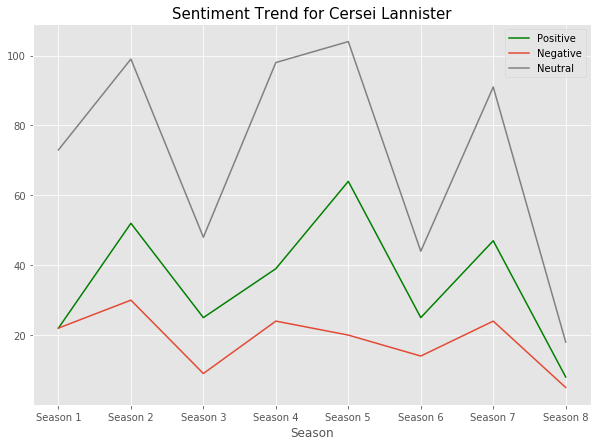

In [26]:
ax = plt.gca()
cersei.plot(kind = 'line', x = 'Season', y = 'Positive', color = 'green', figsize = (10, 7), ax = ax)
cersei.plot(kind = 'line', x = 'Season',y = 'Negative', ax = ax)
cersei.plot(kind = 'line', x = 'Season',y = 'Neutral', color = 'grey', ax = ax)
plt.title("Sentiment Trend for Cersei Lannister", fontsize = 15)

plt.show()

In [27]:
jon = script_sentiment[script_sentiment['Name']=='jon snow']
jon = jon.groupby(['Name','Season'])[['Positive','Negative','Neutral']].sum().reset_index()
jon

,Name,Season,Positive,Negative,Neutral
0,jon snow,Season 1,28,16,92
1,jon snow,Season 2,9,11,77
2,jon snow,Season 3,19,10,62
3,jon snow,Season 4,23,18,97
4,jon snow,Season 5,43,17,102
5,jon snow,Season 6,37,11,69
6,jon snow,Season 7,53,39,151
7,jon snow,Season 8,26,25,98


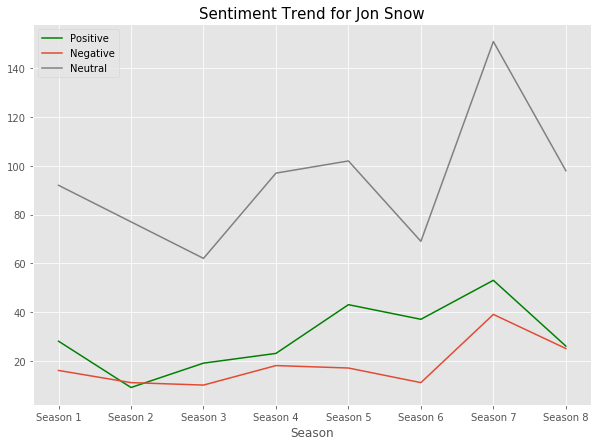

In [28]:
ax = plt.gca()
jon.plot(kind = 'line', x = 'Season', y = 'Positive', color = 'green', figsize = (10, 7), ax = ax)
jon.plot(kind = 'line', x = 'Season',y = 'Negative', ax = ax)
jon.plot(kind = 'line', x = 'Season',y = 'Neutral', color = 'grey', ax = ax)
plt.title("Sentiment Trend for Jon Snow", fontsize = 15)

plt.show()

In [29]:
jaime = script_sentiment[script_sentiment['Name']=='jaime lannister']
jaime = jaime.groupby(['Name','Season'])[['Positive','Negative','Neutral']].sum().reset_index()
jaime

,Name,Season,Positive,Negative,Neutral
0,jaime lannister,Season 1,21,24,39
1,jaime lannister,Season 2,23,14,35
2,jaime lannister,Season 3,32,24,73
3,jaime lannister,Season 4,41,27,112
4,jaime lannister,Season 5,26,10,67
5,jaime lannister,Season 6,33,12,73
6,jaime lannister,Season 7,37,26,109
7,jaime lannister,Season 8,24,5,58


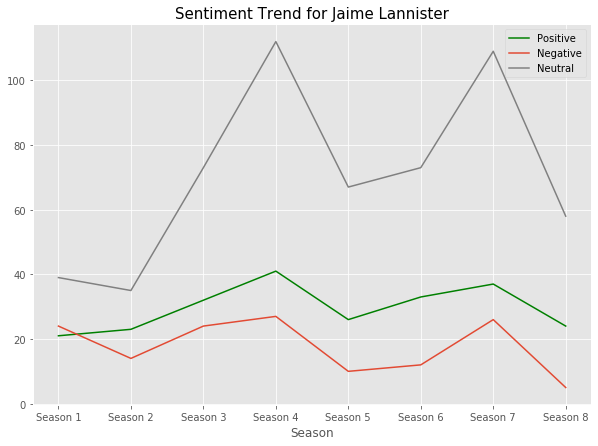

In [30]:
ax = plt.gca()
jaime.plot(kind = 'line', x = 'Season', y = 'Positive', color = 'green', figsize = (10, 7), ax = ax)
jaime.plot(kind = 'line', x = 'Season',y = 'Negative', ax = ax)
jaime.plot(kind = 'line', x = 'Season',y = 'Neutral', color = 'grey', ax = ax)
plt.title("Sentiment Trend for Jaime Lannister", fontsize = 15)

plt.show()

In [31]:
daenerys = script_sentiment[script_sentiment['Name']=='daenerys targaryen']
daenerys = daenerys.groupby(['Name','Season'])[['Positive','Negative','Neutral']].sum().reset_index()
daenerys

,Name,Season,Positive,Negative,Neutral
0,daenerys targaryen,Season 1,15,5,106
1,daenerys targaryen,Season 2,30,14,91
2,daenerys targaryen,Season 3,34,9,74
3,daenerys targaryen,Season 4,35,10,80
4,daenerys targaryen,Season 5,31,17,81
5,daenerys targaryen,Season 6,21,13,59
6,daenerys targaryen,Season 7,41,28,122
7,daenerys targaryen,Season 8,34,19,79


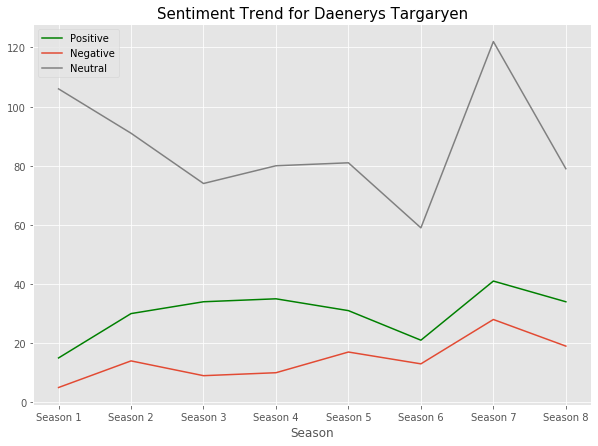

In [32]:
ax = plt.gca()
daenerys.plot(kind = 'line', x = 'Season', y = 'Positive', color = 'green', figsize = (10, 7), ax = ax)
daenerys.plot(kind = 'line', x = 'Season',y = 'Negative', ax = ax)
daenerys.plot(kind = 'line', x = 'Season',y = 'Neutral', color = 'grey', ax = ax)
plt.title("Sentiment Trend for Daenerys Targaryen", fontsize = 15)

plt.show()

In [33]:
sansa = script_sentiment[script_sentiment['Name']=='sansa stark']
sansa = sansa.groupby(['Name','Season'])[['Positive','Negative','Neutral']].sum().reset_index()
sansa

,Name,Season,Positive,Negative,Neutral
0,sansa stark,Season 1,9,16,74
1,sansa stark,Season 2,14,12,57
2,sansa stark,Season 3,24,13,50
3,sansa stark,Season 4,17,13,67
4,sansa stark,Season 5,14,7,75
5,sansa stark,Season 6,31,16,68
6,sansa stark,Season 7,26,22,104
7,sansa stark,Season 8,12,5,38


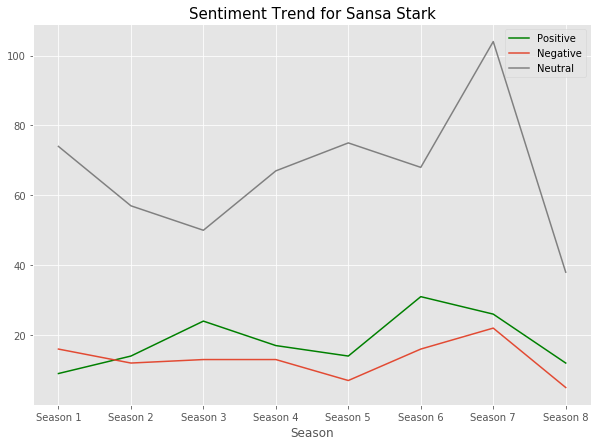

In [34]:
ax = plt.gca()
sansa.plot(kind = 'line', x = 'Season', y = 'Positive', color = 'green', figsize = (10, 7), ax = ax)
sansa.plot(kind = 'line', x = 'Season',y = 'Negative', ax = ax)
sansa.plot(kind = 'line', x = 'Season',y = 'Neutral', color = 'grey', ax = ax)
plt.title("Sentiment Trend for Sansa Stark", fontsize = 15)

plt.show()

In [35]:
petyr = script_sentiment[script_sentiment['Name']=='petyr baelish']
petyr = petyr.groupby(['Name','Season'])[['Positive','Negative','Neutral']].sum().reset_index()
petyr

,Name,Season,Positive,Negative,Neutral
0,petyr baelish,Season 1,32,19,61
1,petyr baelish,Season 2,25,9,45
2,petyr baelish,Season 3,15,3,25
3,petyr baelish,Season 4,18,4,27
4,petyr baelish,Season 5,21,23,48
5,petyr baelish,Season 6,7,3,18
6,petyr baelish,Season 7,15,4,27


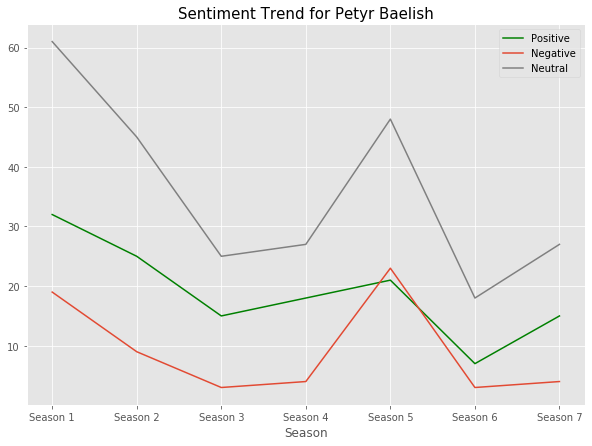

In [43]:
ax = plt.gca()
petyr.plot(kind = 'line', x = 'Season', y = 'Positive', color = 'green', figsize = (10, 7), ax = ax)
petyr.plot(kind = 'line', x = 'Season',y = 'Negative', ax = ax)
petyr.plot(kind = 'line', x = 'Season',y = 'Neutral', color = 'grey', ax = ax)
plt.title("Sentiment Trend for Petyr Baelish", fontsize = 15)

plt.show()

In [37]:
arya = script_sentiment[script_sentiment['Name']=='arya stark']
arya = arya.groupby(['Name','Season'])[['Positive','Negative','Neutral']].sum().reset_index()
arya

,Name,Season,Positive,Negative,Neutral
0,arya stark,Season 1,13,11,78
1,arya stark,Season 2,19,11,97
2,arya stark,Season 3,17,11,76
3,arya stark,Season 4,14,20,68
4,arya stark,Season 5,11,11,57
5,arya stark,Season 6,8,8,44
6,arya stark,Season 7,31,20,76
7,arya stark,Season 8,14,10,58


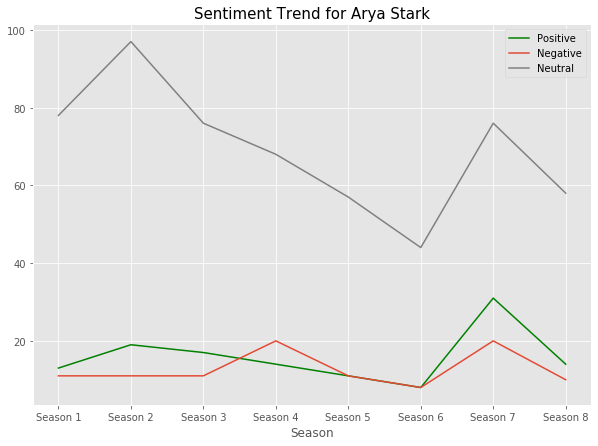

In [44]:
ax = plt.gca()
arya.plot(kind = 'line', x = 'Season', y = 'Positive', color = 'green', figsize = (10, 7), ax = ax)
arya.plot(kind = 'line', x = 'Season',y = 'Negative', ax = ax)
arya.plot(kind = 'line', x = 'Season',y = 'Neutral', color = 'grey', ax = ax)
plt.title("Sentiment Trend for Arya Stark", fontsize = 15)

plt.show()

In [39]:
davos = script_sentiment[script_sentiment['Name']=='davos']
davos = davos.groupby(['Name','Season'])[['Positive','Negative','Neutral']].sum().reset_index()
davos

,Name,Season,Positive,Negative,Neutral
0,davos,Season 2,25,6,64
1,davos,Season 3,17,11,69
2,davos,Season 4,21,6,21
3,davos,Season 5,15,12,26
4,davos,Season 6,22,19,59
5,davos,Season 7,20,15,59
6,davos,Season 8,15,5,21


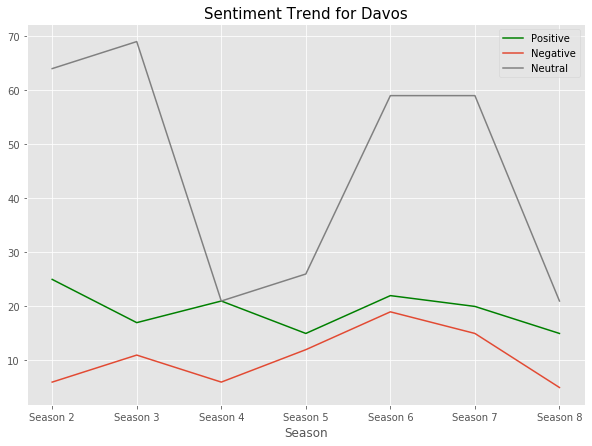

In [45]:
ax = plt.gca()
davos.plot(kind = 'line', x = 'Season', y = 'Positive', color = 'green', figsize = (10, 7), ax = ax)
davos.plot(kind = 'line', x = 'Season',y = 'Negative', ax = ax)
davos.plot(kind = 'line', x = 'Season',y = 'Neutral', color = 'grey', ax = ax)
plt.title("Sentiment Trend for Davos", fontsize = 15)

plt.show()

In [41]:
varys = script_sentiment[script_sentiment['Name']=='varys']
varys = varys.groupby(['Name','Season'])[['Positive','Negative','Neutral']].sum().reset_index()
varys

,Name,Season,Positive,Negative,Neutral
0,varys,Season 1,24,16,25
1,varys,Season 2,22,21,31
2,varys,Season 3,11,6,23
3,varys,Season 4,10,7,14
4,varys,Season 5,19,5,25
5,varys,Season 6,17,9,21
6,varys,Season 7,13,7,21
7,varys,Season 8,2,6,16


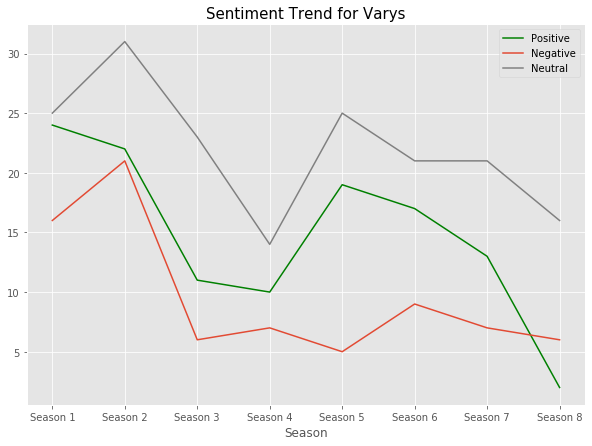

In [46]:
ax = plt.gca()
varys.plot(kind = 'line', x = 'Season', y = 'Positive', color = 'green', figsize = (10, 7), ax = ax)
varys.plot(kind = 'line', x = 'Season',y = 'Negative', ax = ax)
varys.plot(kind = 'line', x = 'Season',y = 'Neutral', color = 'grey', ax = ax)
plt.title("Sentiment Trend for Varys", fontsize = 15)

plt.show()